<h1 id="tocheading">Содержание</h1>
<div id="toc"></div>

# ЦЕЛЬ: Корректировка рекламного бюджета для интернет-магазина компьютерных игр

Для интернет-магазина компьютерных игр "Стримчик" нужно сделать анализ данных до 2016 года включительно и запланировать рекламную кампанию на 2017-й. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Наша задача - **выявить определяющие успешность игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт.

# План исследования

1. Шаг - изучение общей информации:

Обзор данных, первичное исследование.
2. Шаг - подготовка данных:

Приведение данных к нужным типам, поиск и заполнение пропусков, рассчёт суммарных продаж во всех регионах.
3. Шаг - исследовательский анализ данных:
                      - определение актуального временного периода;
                      - оценка характерного срока существования платформ;
                      - выбор потенциально прибыльных платформ;
                      - изучение влияния отзывов на продажи внутри одной популярной платформы;
                      - выделение жанров с высокими и низкими продажами.


4. Шаг - составление портрета пользователя каждого региона, а именно
                      - выявление самых популярных платформ (топ-5);
                      - выявление самых популярных жанров (топ-5);
                      - определение степени влияния рейтинга ESRB на продажи в отдельном регионе.

5. Шаг - проверка гипотез 
                      - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
                      - средние пользовательские рейтинги жанров Action и Sports разные.
                                                                                       
                                            
6. Шаг - общие выводы.

# Исходные данные

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Данные за 2016 год могут быть неполными.

# Исследование

## Шаг 1. Изучение общей информации

Наша задача - изучить имеющиеся данные, понять их взаимосвязи. Имеется 

In [2]:
import pandas as pd 
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 
from scipy.stats import levene
from scipy import stats as st

In [3]:
#import pandas_profiling

In [4]:
#df = pd.read_csv('/Users/mariia/Documents/python/сборный проект/games.csv')
df = pd.read_csv('/datasets/games.csv')

In [5]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Наш датасет представляет собой таблицу из 16715 строк и 11 столбцов. В столбцах Critic_Score, User_Score и Rating есть пропущенные значения. Это может усложнить обработку данных. 

Посмотрим, в каких ещё столбцах есть пропущенные значения: 

In [7]:
columns = df.columns

for i in range(len(columns)): 
    print(columns[i], end='\n\n')
    print(df[columns[i]].isna().sum(), end='\n\n')
    

Name

2

Platform

0

Year_of_Release

269

Genre

2

NA_sales

0

EU_sales

0

JP_sales

0

Other_sales

0

Critic_Score

8578

User_Score

6701

Rating

6766



В столбце Name есть два пропущенных значения. К сожалению, имя игры нельзя заменить на какое-то среднее, или характерное значение, поскольку оно уникально. Эти две строки придётся удалить на следующем этапе. Довольно много пропущенных данных в столбцах, связанных с рейтингом. На следующем этапе посмотрим, где именно сконцентрированы эти данные. Если рейтинг отсутствует у игр, разработанных очень давно (вне актуального периода), возможно, что нам не понадобятся эти данные. В столбце Year_of_Release 269 пропущенных значения. Возможно из того, на какой платформе они выпущены, можно будет восстановить год.

Посмотрим, есть ли строки с одним и тем же имянем игры:

In [8]:
df['Name'].value_counts()

Need for Speed: Most Wanted                12
Ratatouille                                 9
Madden NFL 07                               9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
                                           ..
BattleTanx                                  1
Reel Fishing: The Great Outdoors            1
Football Manager 2015                       1
Strongest Tokyo University Shogi DS         1
Star Wars Episode I: The Phantom Menace     1
Name: Name, Length: 11559, dtype: int64

In [9]:
df.query('Name == "Need for Speed: Most Wanted"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Действительно, название игры может встречаться несколько раз, т.е. столбец Name содержит не только уникальные значения. При этом, строки не являются дубликатами (игры выпускались с одим и тем же названием в разные годы и на разных платформах). Интересно, что для игры с одним и тем же названием значения в столбце Rating различаются. По срезу видно, что пропущенные значения в солбцах Critic_Score и User_Score отсутствуют не всегда одновременно и в целом близки по значениям. Таким образом, для фиксированного названия игры можно заменить пропущенные значения в  столбцах Critic_Score и User_Score на медиану для этой игры. Скорее всего, после такой замены в этих столбцах все равно останутся пропуски. Также видно, что пропуски не сконцентрированы на одной конкретной платформе, или в конкретном году, т.е. распределены скорее всего случайно, но часто пропуск случается во всех трёх столбцах, связанных с рейтингами. Возможно, это маркер, что игра не была популярной, поэтому рейтинги не были проставлены. 

Узнаем, для скольких платформ были выпущены игры:

In [10]:
len(df['Platform'].unique())

31

Проверим, нет ли в таблицах дубликатов:

In [11]:
df.duplicated().sum()

0

Дубликатов нет.

Посмотрим на типы данных:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Претенденты на смену типа данных - столбцы Year_of_Release (из float64 на int) и User_Score (object на float64).

In [13]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Шаг 1. Выводы

В нашем распоряжении таблица с данными о выпуске и продажах видеоигр. В таблице 16715 строк и 11 столбцов с названием игры, платформой, под которую выпущена игра, жанром, годом выпуска, продажами на четырёх типах рынков, тремя типами рейтинга. В данных нет строк-дубликатов, но имя игры не уникально: одни и те же игры выпускались в разные годы для разных платформ.

В таблице есть пропущенные значения. Больше всего значений - 8578 - пропущено в столбце Critic_Score - рейтинг критиков, что составляет 51%. В столбце User_Score пропущено 6701 значений, т.е. 40% данных, как и в столбце Rating (6766 строк пропущено, что составляет около 40% данных).  Поскольку задачей следующих этапов является определение актуального периода и проведение анализа уже только для него, то вопрос замены останется до этого этапа. Нужно посмотреть, сколько пропусков мы имеем в актуальном периоде и тогда решить, нужно ли вообще производить замену. В общем и целом, это нормальная ситуация, когда для какого-то товара нет отзывов. Возможно, его было слишком мало продано, или продажи производились так давно, что вообще не было возможности оставить отзыв. Также есть пропущенные значения в количестве 269 в столбце Year_of_Release. Эти пропуски можно заменить, исходя из предположения, что игру выпустили в год самой большой популярности платформы, т.е. заменить пропуск на среднее значение, сгруппировав предварительно данные по платформам.

Есть также столбцы, где нужно произвести замену типов данных: Year_of_Release (float64 нужно заменить на целочисленный int) и User_Score (object на float64, поскольку рейтинг в данном случае - числовое значение).

## Шаг 2. Подготовка данных

Задачей данного этапа является подготовка данных к дальнешему анализу. В неё входит: 
- замена названий столбцов (приведение к нижнему регистру);
- преобразование данных в нужные типы;
- обработка пропусков при необходимости;

Кроме этого, нужно посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

Переименуем столбцы, используя только нижний регистр:

In [14]:
df.columns = map(lambda x: x.lower(), df.columns)

In [15]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Удалим строки, где отсутствует имя игры:

In [16]:
df.dropna(subset=['name'], inplace=True)
df.reset_index(drop=True, inplace=True)

Удаление произошло успешно. Теперь перейдём к обработке столбца year_of_release. Здесь есть пропущенные значения (в количестве 296). Посмотрим, как выглядят строки с пропусками в этом столбце:

In [17]:
df[df['year_of_release'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


К сожалению, не удалось выявить конкретной логики появления пропусков в столбце year_of_release. Они не связаны с какой-то определённой платформой, или жанром. Т.е. мы не знаем причин, преведшим к пропускам, возможно, это человеческий фактор (ошибка записи данных), или какие-то случайные ошибки. Чтобы не терять 1.8% данных можно попробовать понять, когда были популярны платформы из строк с пропущенными данными и заменить пропуск на среднее значение временного диапазона существования платформы.

In [18]:
df[df['year_of_release'].isna()==True].platform.value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

Для примера посмотрим на время существования платформы PS2:

In [19]:
df[df['platform'] == 'PS2']['year_of_release'].min()

2000.0

In [20]:
df[df['platform'] == 'PS2']['year_of_release'].max()

2011.0

Видим, что платформа PS2 просуществовала 12 лет. Временной промежуток большой. Посмотрим на гистограмму платформы PS2:

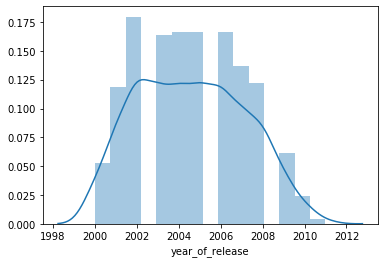

In [21]:
sns.distplot(df[df['platform'] == 'PS2']['year_of_release'].dropna())

Гистограмма не одномодовая. Разумно провести замену пропусков на медианные значения периода существования платформы:

In [22]:
print(df['year_of_release'].isna().sum())

269


In [23]:
def missing_values_recovery(data, parametr_grouped, parametr_value):
    """
    Функция принимает датафрейм, параметр, по которому происходит группировка и параметр, где нужно заменить 
    пропущенное значение на среднее по группе.
    В начале составляем список data_missed уникальных значений параметра parametr_grouped.
    Далее производим группировку по нему и проходим по уникальным значениям списка data_missed. 
    Для каждого уникального значения производим замену пропущенного значения на среднее по группе.
    
    """
    data_missed = data[data[parametr_value].isna()==True][parametr_grouped].unique()
    for parametr, column_slice in data.groupby(parametr_grouped):
        if parametr in data_missed:
            median_value = column_slice[parametr_value].median()
            data.loc[(data[parametr_value].isnull()) & (data[parametr_grouped] == parametr), parametr_value] = ( 
                                            data.loc[(data[parametr_value].isnull()) 
                                            & (data[parametr_grouped] == parametr), parametr_value].fillna(median_value))
    return data

In [24]:
df = missing_values_recovery(df, 'platform', 'year_of_release')
print(df['year_of_release'].isna().sum())

0


Строк с пропущенным годом релиза игры больше нет, замена произошла успешно.

Преобразуем тип данных в столбце с годом релиза игры:

In [25]:
df['year_of_release'] = df['year_of_release'].astype(int) #перевожу в int

Перейдём к обработке пропусков в столбцах с рейтингами. Для начала посмотрим на строки, где пропущены все три рейтинга:

In [26]:
df.loc[(df['critic_score'].isnull()) & (df['user_score'].isnull()) & (df['rating'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Таких строк 6619, это значит, что кроме случаев, когда рейтинг пропущен во всех трёх столбцах, в столбце critic_score есть ещё 1959 пропусков, в столбце user_score - 82, в столбце rating - 147. Т.е. в основной массе пропуски происходят в этих трёх столбцах одновременно. Это может быть маркером того, что игра не была популярной. 

Попробуем сгруппировать данные по названиям игры (в предыдущем шаге было выявлено, что есть строки с повторяющимися значениями name) и сделать замену пропусков в рейтигах critic_score и user_score на среднее значение для игры:

In [27]:
df = missing_values_recovery(df, 'name', 'critic_score')

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [28]:
df['critic_score'].isna().sum()

7615

Число пропусков уменьшилось с 8578 до 7615, т.е. на 11%. Проделать то же самое со вторым столбцом user_score нельзя, поскольку в нём есть данные типа object, которые предварительно нужно обработать и изменить тип данных, если получится. 

Нужно произвести замену типа данных в столбце user_score (object на float64), поскольку рейтинг в данном случае - числовое значение. Мы знаем, что в столбце есть как численные значения, так и значение "tbd", что означает To Be Determined. Причина появления этого значения следующая: как правило рейтинг выставляется как усреднённый по всем отзывам на игру, при этом задаётся минимальное кол-во отзывов, начиная с которой выставляется рейтинг. Фактически для нас значение "tbd" по смыслу аналогично пропущенному, рейтинг не известен (но причины появления настоящих пропусков и значения "tbd", разумеется, различны). 

In [29]:
df.loc[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,42.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16695,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16696,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16702,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Посмотрим, есть ли сильная корреляция между оценками критиков и оценками пользователей. Если да, то значения "tbd" можно заменить, зная значение critic_score. Сохраним в отдельный датасет столбцы critic_score и user_score, где нет пропущенных значений и значения "tbd". 

In [30]:
def corr_counting(data, column_1, column_2, plot=True):
    """
    Функция принимает датафрейм и два столбца. Выделяет в отдельный датафрейм нужные два столбца, 
    причём в строках не содержится пропущенных значений и значений "tbd".
    Функция строит график зависимости значений одного столбца от другого и считает корреляцию.
    """
    new_data = (data.loc[(data[column_1] == data[column_1]) & 
                     (data[column_2] == data[column_2]) & 
                     (data[column_1] != 'tbd') &
                     (data[column_2] != 'tbd'), [column_1, column_2]]
               )
    new_data = new_data.astype(float)
    if plot:
        ax = sns.scatterplot(x=column_1, y=column_2, data=new_data)
    
    return new_data[column_1].corr(new_data[column_2])

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0.5469575429310279

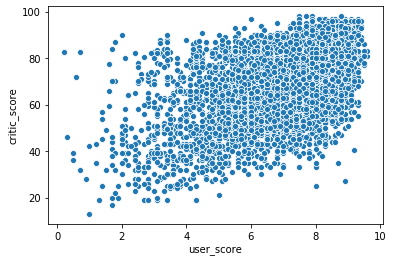

In [31]:
corr_user_critic = corr_counting(df, 'user_score', 'critic_score')
corr_user_critic

Корреляция средняя, по ней нельзя сделать однозначный вывод о значениях user_score. Другое предположение, что user_score сильно коррелировано с продажами (кажется логичным, что если пользователи довольны, то продажи растут). Подсчитаем сначала суммарные продажи, добавим в основной датафрейм, снова выделим два интересующих нас столбца без пропусков и подсчитаем корреляцию:

In [32]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<a name="cell1">Корреляция глобальных продаж и отзывов пользователей</a>

0.08817911987579136

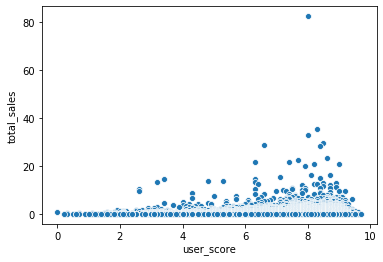

In [33]:
corr_user_score_total_sales = corr_counting(df, 'user_score', 'total_sales')
corr_user_score_total_sales

Между продажами и отзывами пользователей нет корреляции. Поскольку явных вариантов замены значений "tbd" не обнаружилось, то мы оставим эти значения "как есть". Замена на какое-то фиксированное значение не представляется возможной, мы изменим тогда статистики в столбце user_score. Значения также несут осмысленную информацию: с одной стороны это пропуск данных, с другой - может оказаться, что новые игры раскупаются лучше вне независимости от рейтинга. Для старой игры отсутствие рейтинга - явный маркер низкой популярности.

По скольку по сути значения "tbd" в столбце user_score являются по сути пропущенными данными ("tbd" = To Be Determined), мы можем заменить их на "NaN" и изменить тип данных: 

In [34]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float) #перевожу в int

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       9098 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Шаг 2. Выводы

Была произведена подготовка данных, включавшая в себя преведение названия столбцов к нижнему регистру, удаление нескольких строк без имяни игры, заполнение пропущенных значений в столбце year_of_release на медианное значение для каждой платформы, замену типа данных в этом столбце на int (годы - целочисленный параметр). Кроме этого была произведена замена 11% от пропущенных значений в столбце critic_score (через группировку данных по названию игры и замену пропусков на медианное значение по группе). 

В трёх столбцах со значениями, содержащими рейтинги игр, осталось довольно много пропущенных значений. Эти пропуски почти всегда встречаются одновременно во всех трёх столбцах и могут служить индикатором того, что игра не была популярной (поэтому отсутствует рейтинг). Или это может быть ошибкой записи данных.

В столбце user_score значения "tbd" (To Be Determined) были заменены на пропуски, поскольку по смыслу сокращение "tbd" и означает, что отзыв не определён, т.е. значение пропущено. Такая замена корректнее, чем замена на конкретное числовое значение, поскольку новое значение может изменить статистики в столбце.

## Шаг 3. Анализ данных

Задачей данного шага является: 
               - определение актуального временного периода для формирования прогноза на 2017 год,
               - оценка характерного срока существования платформ;
               - выбор потенциально прибыльных платформ;
               - изучение влияния отзывов на продажи внутри одной популярной платформы;
               - выделение жанров с высокими и низкими продажами.

Для начала посмотрим, сколько игр выпускалось в разные годы:

In [36]:
year_of_release_count = df.year_of_release.value_counts()
year_of_release_count

2009    1476
2008    1457
2010    1302
2007    1197
2011    1161
2006    1006
2005     973
2002     829
2003     800
2004     783
2012     653
2015     606
2014     582
2013     552
2016     502
2001     482
1998     386
2000     350
1999     341
1997     290
1996     263
1995     219
1994     121
1993      60
1982      53
1981      46
1992      43
1991      41
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

Text(0.5, 1.0, 'Распределение релизов игр по годам')

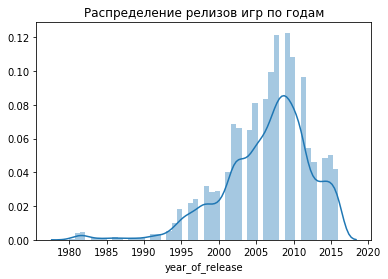

In [37]:
sns.distplot(df['year_of_release']).set_title('Распределение релизов игр по годам')

В 2016 году выпустилось 502 игры, но данные могут быть не полными. Нужно сделать прогноз на 2017 год. Скорее всего нам не нужен весь массив данных. Нужно рассматривать только платформы, которые все ещё существуют, т.е. в последние годы на них продолжали выпускаться игры. 

В задании просят отбросить данные уже после того, как мы посмотрим, как менялись продажи по платформам и определим время жизни платформы. Это делается ниже.

Посмотрим, как менялись продажи по платформам. Для этого выделим в начале самые популярные платформы:

In [38]:
df.platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Две самые популярные платформы - это PS2 и DS, но это рейтинг по количеству выпущенных игр. Может оказаться, что рейтинг платформ по суммарным продажам выглядит иначе. Проведём группировку по платформам и подсчитаем суммарные продажи:

In [39]:
def best_in_category(data, category, market):
    """
    Функция принимает датафрейм, группирует датафрейм по параметру category,
    в ней считает суммарные продажи на конкретном рынке market, выводит отсортированный 
    по суммарным продажам на этом рынке датафрейм. 
    """
    best_total_sales = (data.groupby(category).
                            agg({market: ['sum']}).reset_index())
    column_1 = market + '_sum'
    best_total_sales.columns = [category, column_1]
    best_total_sales = best_total_sales.sort_values(by = column_1, ascending = False)
    
    return best_total_sales

In [40]:
platforms_total_sales = best_in_category(df, 'platform', 'total_sales')
platforms_total_sales.head(10)

,platform,total_sales_sum
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


На первом месте находится всё та же платформа PS2, но в остальном рейтинги различаются в первой пятёрке только порядком следования, но не составом. Выделим шесть самых "продающих" платформ (поскольку продажи у шестой и седьмой платформ различаются более, чем в два раза, логично провести здесь границу).

In [41]:
top_6_platforms = platforms_total_sales['platform'].values[:6].tolist()
top_6_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Для того, чтобы определить, за какой характерный срок появляются новые и исчезают старые платформы, построим для top_6_platforms распределение по годам:

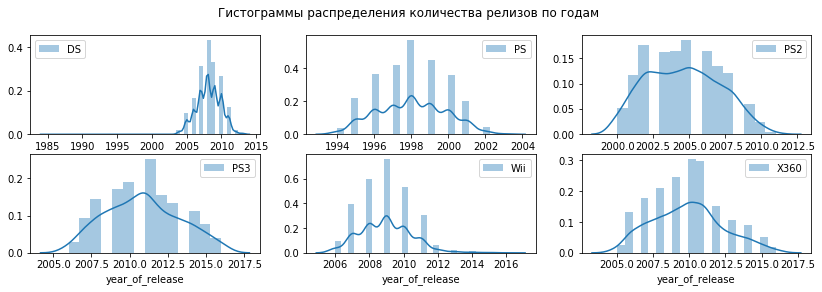

In [42]:
fig, axs = plt.subplots(2,3,figsize=(14,4))
fig.suptitle("Гистограммы распределения количества релизов по годам")

i=0
for column_value, column_slice in df.groupby('platform'):
    if column_value in top_6_platforms:
        ax = axs[i//3][i%3]
        sns.distplot(column_slice['year_of_release'], ax = ax, norm_hist=True, kde=True, label=column_value)
        ax.legend()
        i+=1
plt.show()

Построим для наглядности гистограммы на одном графике:

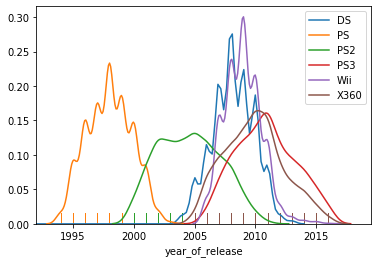

In [43]:
for column_value, column_slice in df.groupby('platform'):
    if column_value in top_6_platforms:
        sns.distplot(column_slice['year_of_release'], rug=True, norm_hist=True, kde=True, hist=False, label=column_value)
plt.legend()
plt.xlim(1992,None)
plt.show()

In [44]:
platforms_life_time = df.groupby('platform').agg({'year_of_release': lambda x: x.max() - x.min()})
top_platforms_life_time = platforms_life_time.query('platform in @top_6_platforms')
top_platforms_life_time

,year_of_release
platform,
DS,28
PS,9
PS2,11
PS3,10
Wii,10
X360,11


In [45]:
top_platforms_life_time.query('platform in @top_6_platforms')['year_of_release'].median()

10.5

По гистограммам видно, что для каждой платформы можно выделить её "время жизни", т.е. период, когда для платформы активно выходили игры. По грубым оценкам по построенным гистограммам, средняя продолжительность жизни платформы составляет примерно 11 лет. По более точному рассчёту (через медианное значение) - 10,5 лет. Таким образом, период с 2006 по 2016 год будем считать **актуальным**.

In [46]:
df.groupby('platform').year_of_release.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,133.0,1982.120301,1.858794,1980.0,1981.00,1982.0,1982.00,1989.0
3DO,3.0,1994.666667,0.577350,1994.0,1994.50,1995.0,1995.00,1995.0
3DS,520.0,2013.125000,1.634688,2011.0,2012.00,2013.0,2015.00,2016.0
DC,52.0,1999.942308,1.808623,1998.0,1999.00,2000.0,2000.00,2008.0
DS,2151.0,2008.182706,1.766246,1985.0,2007.00,2008.0,2009.00,2013.0
GB,98.0,1995.969388,4.157850,1988.0,1992.00,1997.0,2000.00,2001.0
GBA,822.0,2003.208029,1.464741,2000.0,2002.00,2003.0,2004.00,2007.0
GC,556.0,2003.390288,1.375662,2001.0,2002.00,2003.0,2005.00,2007.0
GEN,27.0,1993.037037,1.091276,1990.0,1992.00,1993.0,1994.00,1994.0


Судя по значениям в последнем столбце "max" таблицы, полученной методом describe() для каждой платформы, в наших данных фигурирует много платформ, игр на которых уже не выпускаются. Выделим в отдельный датасет те платформы, для которых значения в последнем столбце "max" равны "2015" или "2016" (если платформа ещё активна, вряд ли пропуск в релизе будет дольше одного года), а затем отфильтруем датасет таким образом, чтобы в нём фигурировали данные только актуального периода, т.е. за последние 11 лет:

In [47]:
data_relevant = []
for column_value, column_slice in df.groupby('platform'):
    if (column_slice['year_of_release'].max() == 2016) or (column_slice['year_of_release'].max() == 2015) :
        column_slice['platform'] = column_value
        data_relevant.append(column_slice)
data_relevant = pd.concat(data_relevant)
data_relevant

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16641,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,64.0,6.6,E,0.01
16643,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,77.0,NaN,NaN,0.01
16658,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01


In [48]:
data_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 33 to 16670
Data columns (total 12 columns):
name               7832 non-null object
platform           7832 non-null object
year_of_release    7832 non-null int64
genre              7832 non-null object
na_sales           7832 non-null float64
eu_sales           7832 non-null float64
jp_sales           7832 non-null float64
other_sales        7832 non-null float64
critic_score       4866 non-null float64
user_score         4450 non-null float64
rating             5249 non-null object
total_sales        7832 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 795.4+ KB


In [49]:
data_relevant = data_relevant[data_relevant['year_of_release'] >= 2006]

In [50]:
data_relevant.year_of_release.describe()

count    7523.000000
mean     2010.851123
std         2.853865
min      2006.000000
25%      2009.000000
50%      2011.000000
75%      2013.000000
max      2016.000000
Name: year_of_release, dtype: float64

Итак, мы получили новый датафрейм data_relevant, на основании которого можно делать прогноз на 2017 год. В нём 7832 строки. Посмотрим, rакие платформы лидируют по продажам в нашем актуальном датасете:

In [51]:
platforms_relevant_total_sales = best_in_category(data_relevant, 'platform', 'total_sales').reset_index()
platforms_relevant_total_sales

,index,platform,total_sales_sum
0,8,X360,963.17
1,2,PS3,939.65
2,6,Wii,907.51
3,3,PS4,314.14
4,0,3DS,259.00
5,4,PSP,243.15
6,1,PC,167.18
7,9,XOne,159.32
8,7,WiiU,82.19
9,5,PSV,54.07


In [1]:
data_relevant.groupby('platform')['total_sales'].describe()

NameError: name 'data_relevant' is not defined

В нашем актуальном датасете 10 платформ, в изначальном датасете их было 31. Лидируют по продажам первые три платформы в списке: X360, PS3 и Wii.
Уточним актуальный период, поскольку выбранны актуальным период в 11 лет приводит к неактуальным результатам топовых платформ: PS3 и X360, которые уже заменены на последующие варианты. Для уточнения посмотрим динамику продаж для 10 оставшихся платформ:

Создадим сводную таблицу, где в строках будут годы, а в столбцах значения продаж на глобальном рынке для каждой платформы.
Для использования группировки по годам, изменим тип данных в столбце year_of_release на тип data:

In [53]:
platforms_years = (pd.pivot_table(data_relevant, index='year_of_release',
                                 columns='platform', values='total_sales',
                                 aggfunc='sum')
                  )
platforms_years

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2006,NaN,2.85,20.96,NaN,55.32,NaN,137.15,NaN,51.62,NaN
2007,NaN,9.28,73.19,NaN,46.93,NaN,152.77,NaN,95.41,NaN
2008,NaN,12.42,118.52,NaN,34.55,NaN,171.32,NaN,135.26,NaN
2009,NaN,16.91,130.93,NaN,42.30,NaN,223.30,NaN,120.29,NaN
2010,NaN,28.04,142.17,NaN,35.04,NaN,127.95,NaN,180.21,NaN
2011,63.20,35.03,165.09,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012,51.36,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,57.76,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07


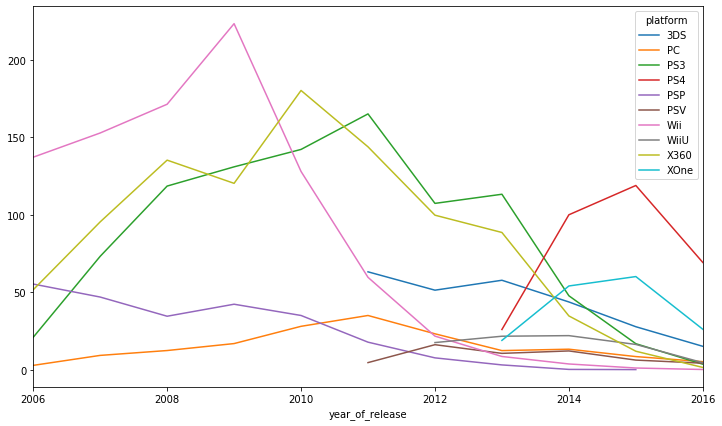

In [54]:
fig, ax = plt.subplots(figsize=(12,7))
data_plot = data_relevant.groupby(['platform', 'year_of_release']).sum()['total_sales']
data_relevant.groupby(['year_of_release', 'platform']).sum()['total_sales'].unstack().plot(ax=ax)

По таблице platforms_years и по построенному графику видим, что примерно половины платформ, актуальных сейчас в 2006 - 2012 годах не существовала, а актуальные тогда платформы уже не актуальны сейчас. Кроме того, в 2012 - 2013 годах произошёл переход на новые версии платформ PS3 на PS4, и X360 на XOne. Таким образом, логично выбрать в качестве актуального период, когда в датасете фигурируют уже все новые платформы, т.е. начиная с 2013 года:

In [55]:
data_relevant = data_relevant[data_relevant['year_of_release'] >= 2013]
data_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 33 to 16670
Data columns (total 12 columns):
name               2234 non-null object
platform           2234 non-null object
year_of_release    2234 non-null int64
genre              2234 non-null object
na_sales           2234 non-null float64
eu_sales           2234 non-null float64
jp_sales           2234 non-null float64
other_sales        2234 non-null float64
critic_score       1324 non-null float64
user_score         1195 non-null float64
rating             1256 non-null object
total_sales        2234 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.9+ KB


Мы получили датасетdata_relevant, по которому можно делать прогноз на 2017 год, содержащий 2232 строки. Посмотрим, какие платформы лидируют по продажам в нашем актуальном датасете:

In [56]:
platforms_relevant_total_sales = best_in_category(data_relevant, 'platform', 'total_sales').reset_index()
platforms_relevant_total_sales

,index,platform,total_sales_sum
0,3,PS4,314.14
1,2,PS3,181.43
2,9,XOne,159.32
3,0,3DS,144.44
4,8,X360,136.80
5,7,WiiU,64.63
6,1,PC,39.43
7,5,PSV,33.25
8,6,Wii,13.66
9,4,PSP,3.50


Топ-5 платформ выглядит логично, поскольку новые версии платформ опережают по продажам старые (демонстрируют правильный тренд).

На всех платформах продажи падают, это может быть в том числе результатом того, что занные за 2016 год неполные. 
Выделим топ-5 платформ из датасета platforms_relevant_total_sales:

In [57]:
top5_platform_2017 = platforms_relevant_total_sales.loc[:4]['platform'].to_list()
top5_platform_2017

['PS4', 'PS3', 'XOne', '3DS', 'X360']

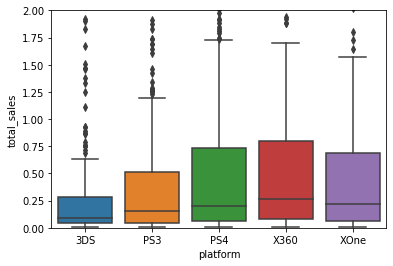

In [58]:
#top3_platform_2017 = ['PS4', 'XOne', '3DS']

#fig, axs = plt.subplots(1,1,figsize=(10,7))

fig.suptitle("Диаграммы размаха суммарных продаж игр для топовых платформ")
data_relevant_top5 = data_relevant.query('platform in @top5_platform_2017')        
sns.boxplot(data=data_relevant_top5, y='total_sales', x='platform')
plt.ylim([0,2])
plt.show()


Судя по диаграммам размаха для ~~трёх~~ пяти платформ, в среднем чуть более высокие продажи соответствуют платформе "XOne" (мы не учитываем платформу X360 для прогнозирования продаж в 2017 году, поскольку её новая версия XOne более популярна).
Три четверти продаж для "XOne"и для платформы "PS4" лежат приблизительно в одном диапазоне значений, это две наиболее перспективные платформы.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Возьмём для оценки платформу "X360":

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0.29145841466963734

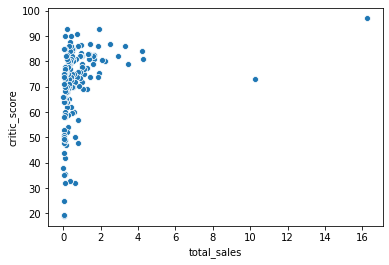

In [59]:
corr_counting(data_relevant.query('platform == "X360"'), "total_sales", "critic_score")

Значения глобальных продаж и отзывов критиков демонстрируют умеренную корреляцию. По диаграмме рассеяния можно сказать, что высоким продажам соответствуют игры с более высокими баллами отзывов критиков, чем в среднем. Посмотрим на корреляцию продаж с отзывами пользователей:

-0.011742185147181342

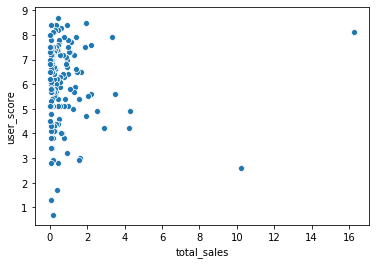

In [60]:
corr_counting(data_relevant.query('platform == "X360"'), "total_sales", "user_score")

Неожиданным образом корреляция глобальных продаж с отзывами пользователей оказалась очень слабой, слабее, чем с отзывами критиков.

Во втором шаге при поиске вариантов замены пропусков, уже была построена <a href="#cell1">диаграмма рассеяния</a> и подсчитана корреляция для всего датасета. Она составляет 0.09. Т.е. можно можно сделать несколько выводов:
- для платформы "X360" корреляция между отзывами пользователей и глобальными продажами слабая;
- та же корреляция для всех платформ в датасете ещё ниже;
- корреляции глобальных продаж с отзывами критиков умеренная, т.е. она выше, чем корреляция с отзывами пользователей как для платформы "X360", так и для всех платформ в датасете;
- судя по диаграмме размаха для платформы "X360" можно сказать, что высоким продажам соответствуют игры с более высокими баллами отзывов критиков, чем в среднем.

Подсчитаем для каждой из top5_platform_2017 корреляции глобальных продаж с отзывами критиков и с отзывами пользователей:

In [61]:
corr_sales_critic = ([corr_counting(data_relevant.query('platform == "%s"' % platform), 
                    "total_sales", "critic_score",plot=False) for platform in top5_platform_2017]
                    )
corr_sales_user = ([corr_counting(data_relevant.query('platform == "%s"' % platform), 
                    "total_sales", "user_score",plot=False) for platform in top5_platform_2017]
                  )
comparison_platforms = (pd.DataFrame({'platform': top5_platform_2017, 
                        'sales_user': corr_sales_user, "sales_critic": corr_sales_critic})
                       )
comparison_platforms


,platform,sales_user,sales_critic
0,PS4,-0.031957,0.390890
1,PS3,0.002394,0.294850
2,XOne,-0.068925,0.374384
3,3DS,0.250366,0.345563
4,X360,-0.011742,0.291458


Мы видим, что для всех платформ из top5_platform_2017, корреляции продаж с отзывами пользователей значительно ниже, чем с отзывами критиков. Таким образом, отзывы критиков являются более важным фактором при выборе игр. Но этот фактор оказывает не столь сильное влияние, поскольку корреляции для всех платформ являются умеренными.

Посмотрим на общее распределение игр по жанрам. Посмотрим, можно ли выделить прибыльные жанры и жанры с низкими продажами:

In [62]:
len(data_relevant['genre'].unique())

12

Всего в датасете фигурирует 12 жанров.

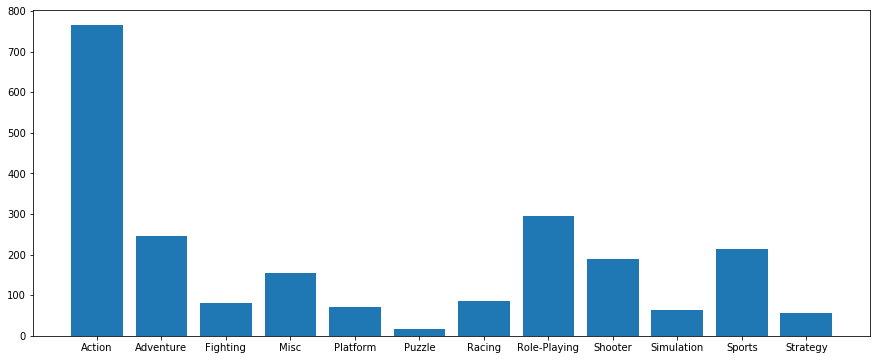

In [63]:
# не работает в облаке:
# data_relevant['genre'].hist(bins=12, figsize=(10, 6)) 

d = data_relevant.groupby('genre').count()["name"]
x = range(len(d))
fig = plt.figure(figsize=(15,6))
plt.bar(x,d)
plt.xticks(x, d.index)
plt.show()

Видим, что больше всего игр было выпущено за актуальный период в жанре "Action". В этом жанре почти в 2 раза больше игр, чем во втором жанре по рейтингу ("Sports"). Но это не говорит о том, что они принесли больше всего прибыли. Подсчитаем, какие жанры были самыми прибыльными:

In [64]:
best_in_category(data_relevant, 'genre', 'total_sales')

,genre,total_sales_sum
0,Action,321.77
8,Shooter,233.05
10,Sports,150.64
7,Role-Playing,146.18
3,Misc,62.74
4,Platform,41.94
6,Racing,39.98
2,Fighting,35.31
1,Adventure,23.70
9,Simulation,22.04


Да, самую большую прибыль в актуальном периоде также принес жанр "Action". Второе и третье место (практически с одинаковыми показателями) делят жанры "Shooter" и "Sports" соответственно.

## Шаг 3. Выводы

В данном шаге было оценено характерное время жизни платформ, т.е. время, когда для платформы выпускались игры. По приблизительным оценкам оно составило 11 лет. Таким образом, актуальный период для составления прогноза на 2017 год изначально также был выбран равным 11 годам. Кроме того, из актуального периода были убраны все платформы, для которых не выпускались игры в 2015 и 2016 году. Таким образом был получен датасет data_relevant, состоящий из 7832 строк, т.е. содержащий 47% данных первоначального датасета.

В актуальном датасете были выбраны платформы, лидирующий по продажам: X360, PS3 и Wii. Для того, чтобы понять, растут продажи, или падают (для конкретной платформы), были построены графики распределения продаж по годам. Из графика стало ясно, что лидеры продаж уже прошли свои пики, а самыми потенциально привлекательными платформами для выпуска игр в 2017 года представляются платформы PS4, XOne и 3DS. В связи с этим был переопределён актуальный период: в датасете остались данные, начиная с 2013 года, когда старые версии платформ X360 и PS3 уже были заменены на новые PS4 и XOne.
   
Судя по диаграммам размаха для трёх платформ, в среднем чуть более высокие продажи соответствуют платформе "XOne", при этом 75% продаж для XOne и для платформы PS4 лежат примерно в одном диапазоне, это две наиболее перспективные платформы для 2017 года.

Исхродя из диаграмм рассеяния и оценок корреляций между отзывами критиков/пользователей и продажами видеоигр можно сделать вывод о том, что оба типа отзывов, по видимому, не оказывают сильного влияния на глобаные продажи. Корреляция доходов видеоигр с отзывами критиков умеренная, а с отзывами пользователей - слабая. Тем не менее на диаграммах рассеяния видно, что более высоким продажам соответствуют игры с более высоким оценками пользователей и критиков, чем в среднем по актуальному датасету. Корреляции по всему датасету демонстрируют похожие зависимости.

В актуальном датасете можно выдлить более прибыльные жанры: это Action, Shooter и Sports. По количеству выпущенных игр также лидирует жанр Action, а второе и третье место занимают Sports и Music соответственно.

## Шаг 4. Составление портрета пользователя каждого региона

В этом шаге нам нужно составить портрет пользователя каждого региона, а именно:
               - выявить самые популярные платформы (топ-5);
               - выявить самые популярные жанры (топ-5);
               - определить степени влияния рейтинга ESRB на продажи в отдельном регионе.

В прошлом шаге мы остановились на изучении жанров. Продолжим анализ жанров теперь уже для разных рынков. Воспользуемся готовой функцией best_in_category, построим круговую диаграмму, для которой оценим для каждого жанра доли рынка:

In [65]:
def pie_counting (data, category, market, best_n, ax):
    """
    Функция принимает датафрейм data, категорию, для которой будет проводиться группировка category,
    рынок, для которого будет проводиться оценка market и количество элементов на диаграмме (все остальные 
    войдут в категорю "Others"). В результате функция строит круговую диаграмму, выводит доли продаж.
    """
    best_total_sales = best_in_category(data, category, market)
    best_total_sales_top = best_total_sales.copy()
    best_total_sales_top.index = range(len(best_total_sales_top.index))
    best_total_sales_top = best_total_sales_top.loc[:best_n - 1]
    column_1 = market + '_sum'
#     others_sales = round(best_total_sales.loc[best_n + 1:, column_1].sum(), 2)
    others_sales = round(best_total_sales[best_n:][column_1].sum(), 2)
    best_total_sales_top = (best_total_sales_top.loc[:best_n - 1].
                            append({category: "Others", column_1: others_sales}, ignore_index=True)
                           )
    ax.set_title(market)
    best_total_sales_top.plot(kind='pie', y = column_1, ax=ax, autopct='%1.1f%%', startangle=105, shadow=False, labels=best_total_sales_top[category], legend = False, fontsize=10)
    ax.set_ylabel("")
    

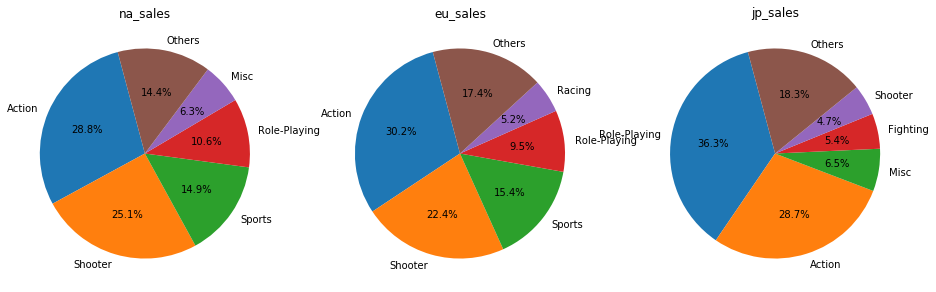

In [66]:
markets = ['na_sales', 'eu_sales', 'jp_sales']
fig, axs = plt.subplots(1,len(markets),figsize=(16,8))
for i, market in enumerate(markets):
    pie_counting(data_relevant, 'genre', market, 5, axs[i])
plt.show()

Интересно, что для разных рынков самые популярные жанры почти не отличаются. В разном порядке самые популярными являются Action, Shooter, Sports, Misc, Role-Playing и Racing. Самый популярный жанр для рынка Северной Америки и Европы - Action, а для рынка Японии этот жанр на втором месте. В Японии при этом лидирует жанр Role-Playing, который находится на предпоследнем месте популярных жанров на рынках Европы и Северной Америки.

Посмотрим теперь на самые популярные платформы (топ-5) для тех же рынков: 

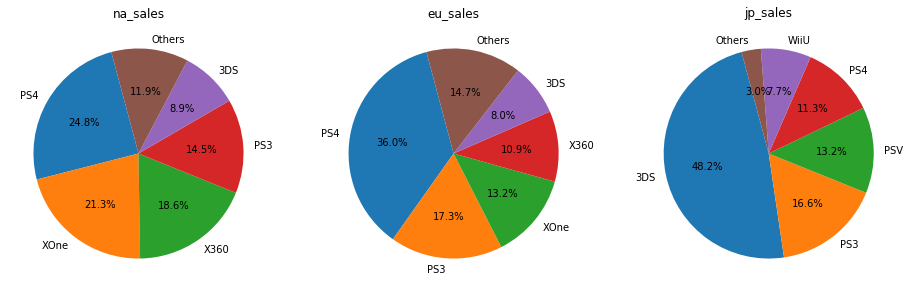

In [67]:
fig, axs = plt.subplots(1,len(markets),figsize=(16,8))
for i, market in enumerate(markets):
    pie_counting(data_relevant, 'platform', market, 5, axs[i])
plt.show()

Для рынков Северной Америки и Европы характерен полностью одинаковый набор платформ в топ-5. Если сравнивать с рынком Японии, то три из пяти наименований совпадают: то PS4, PS3 и 3DC. Лидерами рынков являются платформа PS4 для рынка Северной Америки и Европы и 3DS для рынка Японии. Самым вариативным является рынок Европы, здесь 14.7% продаж приходится на плаформы не из топ-5. Самый консервативный стал рынок Японии: только 3% рынка остаётся платформам, не вошедшим в топ-5.

Если описать лидеров рынков более детально, то мы видим, что платформа PS4 захватила 24.8% рынка Северной Америки, при этом на рынке Европы она имеет гораздо большую долю - 36.0%, на рынке Японии она составляет 11.3%. Лидер рынка Японии - практически монополист: на продажи игр платформы 3DC приходится 48.2% всех продаж. На рынке Европы эта платформа держется лишь на пятом месте с 8%, как и на рынке Северной Америки (процентуально продажи чуть выше - 8.9%).

Попробуем определить, влияет ли рейтинг ESRB на продажи в отдельном регионе. Для этого определим сначала, сколько уникальных параметров рейтинга ESRB в нашем актуальном датасете: 

In [68]:
data_relevant_clean = data_relevant.loc[data_relevant['rating'] == data_relevant['rating']]
data_relevant_clean.index = range(len(data_relevant_clean.index))
data_relevant_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59
1,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
2,The Legend of Zelda: A Link Between Worlds,3DS,2013,Action,1.40,1.01,0.46,0.23,91.0,8.9,E,3.10
3,Animal Crossing: Happy Home Designer,3DS,2015,Simulation,0.51,1.02,1.40,0.12,66.0,6.9,E,3.05
4,The Legend of Zelda: Majora's Mask 3D,3DS,2015,Action,1.15,0.55,0.47,0.17,89.0,9.0,E10+,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...
1251,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,70.0,6.8,T,0.01
1252,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
1253,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
1254,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,64.0,6.6,E,0.01


In [69]:
data_relevant_clean['rating'].unique()

array(['E', 'T', 'E10+', 'M'], dtype=object)

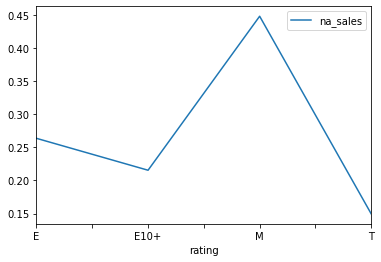

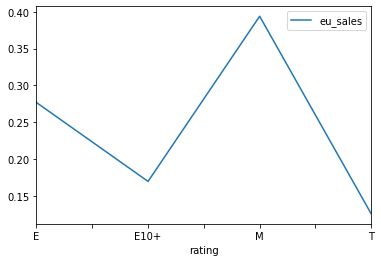

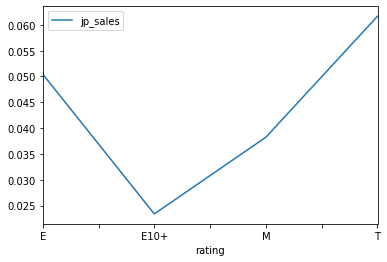

In [70]:
for i, market in enumerate(markets):
    data_relevant_clean.loc[:, [market, 'rating']].groupby('rating').mean().plot()

По графикам зависимости средних значений продаж игр для каждого рейтинга можно сделать вывод, что рынки Европы и Северной Америки снова демонстрируют схожие тенденции (и отличаются от рынка Японии). На этих рынках лидируют игры с рейтингом M, второе и третье место занимают игры с рейтингом Е и Е10+ соответственно, а рейтингу Т соответствуют почти нулевые продажи. Рынок Японии отличает рейтинги Т и Е, лидирующие по продажам, далее следуют игры с рейтингом М, а Е10+ характеризуется продажами, близкими к нулевым. Посмотрим на то, какую долю рынка занимает каждый рейтинг:

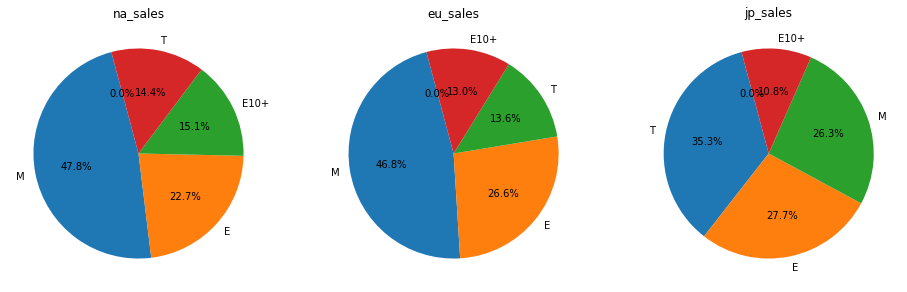

In [71]:
fig, axs = plt.subplots(1,len(markets),figsize=(16,8))
for i, market in enumerate(markets):
    data_relevant_clean = data_relevant.loc[data_relevant['user_score'] == data_relevant['user_score']]
    pie_counting(data_relevant_clean, 'rating', market, 6, ax=axs[i])
plt.show()

Круговые диаграммы всех трёх рынков демонстирируют схожее поведение: самые большие суммарные продажи у игр с рейтингами М, Е, Т и Е10+.

## Шаг 4. Выводы

В этом шаге были изучены особенности рынков Европы, Северной Америки и Японии. При том, что общие тенденции поведения пользователей схожи, небольшие отличи рынков помогут сформировать более успешные рекламные компании. 


Так, для всех трёх рынков самые популярные жанры почти не отличаются. В разном порядке в списки лидеров входят Action, Shooter, Sports, Misc, Role-Playing и Racing. Самый популярный жанр в Японии - Role-Playing, при этом для Северной Америки и Европы он замыкает список топ-5-лидеров по продажам. Жанр Action лидирует для Европы и Северной Америки и занимает второе место на рынке Японии.


Для рынков Северной Америки и Европы характерен одинаковый набор платформ в топ-5: четыре из пяти наименований совпадают. Если сравнивать с рынком Японии, то три из пяти наименований совпадают: то PS4, PS3 и 3DC. Лидерами рынков являются платформа PS4 для рынка Северной Америки и Европы и 3DS для рынка Японии. Самым вариативным является рынок Европы, здесь 14.7% продаж приходится на плаформы не из топ-5. Самый консервативный стал рынок Японии: только 3% рынка остаётся платформам, не вошедшим в топ-5.

Рейтинг ESRB влияет на продажи в отдельном регионе: в Европе и Северной Америке самые высокие продажи у игр с рейтингом M (Mature) и E (Everyone), в Японии первое и второе место занимают E (Everyone) и и Е10+ (Everyone 10+); T (Teen) и E лидируют на рынке Японии.

## Шаг 5. Проверка гипотез

Задачей данного шага является проверка двух гипотез о том, что

               - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
               - средние пользовательские рейтинги жанров Action и Sports разные.

Для первого утверждения сформулируем нулевую и альтернативную гипотезы: 
- **нулевая гипотеза**:  средние пользовательские рейтинги платформ Xbox One и PC одинаковы,
- **альтернативная гипотеза**:  средние пользовательские рейтинги платформ Xbox One и PC различаются.
Мы берём утвердительную формулировку для нулевой гипотезы, как это и принято в статистическом анализе. Для проверки гипотезы будем использовать тест Т-Стьюдента. Предварительная гипотеза отвергается, если значение p-value < alpha, где alpha - критический уровень статистической значимости. Зададим для нашего эксперимента alpha = 0.05.

Основные требования для проведения теста Стьюдента:

1. Дисперсия двух групп приблизительно одинакова.
2. Распределения являются нормальными.
Даже если распределение не нормальное, но в нашей выборке больше 30 измерений, то можно использовать тест Стьюдента. Для проверки первого требования возьмём критерий Левене. Математический аппарат для проверки критерия есть в пакете scipy.stats. Проведём необходимые расчёты в актуальном датасете, не содержащем пропущенные значения и значения "tbd":

In [72]:
data_relevant_clean = (data_relevant.loc[(data_relevant['user_score'] == data_relevant['user_score']) & 
                     (data_relevant['user_score'] != 'tbd')])

x1 = data_relevant_clean.query('platform == "XOne"')['user_score'].astype(float)
x2 = data_relevant_clean.query('platform == "PC"')['user_score'].astype(float) 
len(x1), len(x2)

(182, 155)

Обе выборки содержат больше 30 элементов, будем использовать тест Стьюдента.

In [73]:
levene(x1, x2)

LeveneResult(statistic=8.44812129543499, pvalue=0.003897553110130418)

Получили pvalue < alpha (задаём такой же уровень значимости = 0.05). Исходя из теста Левене, нам удалось отвергнуть гипотезу о том, что дисперсии оценок пользователей для двух платформ приблизительно одинаковы. Используем тогда тест Стьюдента с параметром equal_var = False:

In [74]:
results = st.ttest_ind(x1, x2, equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  0.14759594013430463


Поскольку мы получили, что pvalue > alpha, то мы не отвергаем нулевую гипотезу, т.е.  **средние пользовательские рейтинги платформ Xbox One и PC, по всей видимости, одинаковы**.

Для второго утверждения также сформулируем нулевую и альтернативную гипотезы: 
- **нулевая гипотеза**:  средние пользовательские рейтинги жанров Action и Sports одинаковы,
- **альтернативная гипотеза**:  средние пользовательские рейтинги жанров Action и Sports различаются. 

Проделаем те же этапы:

In [75]:
y1 = data_relevant_clean.query('genre == "Action"')['user_score'].astype(float)
y2 = data_relevant_clean.query('genre == "Sports"')['user_score'].astype(float) 
len(y1), len(y2)

(389, 160)

Обе выборки содержат больше 30 элементов, будем использовать тест Стьюдента. Проверим, равны ди дисперсии в выборках:

In [76]:
levene(y1, y2)

LeveneResult(statistic=26.779617457468024, pvalue=3.206878862928764e-07)

Получили pvalue < alpha (задаём такой же уровень значимости = 0.05). Исходя из теста Левене, мы отвергаем гипотезу о том, что дисперсии двух групп пользователей приблизительно одинаковы. Т.е. в тесте Стьюдента необходимо указать параметр equal_var = False:

In [77]:
results = st.ttest_ind(y1, y2, equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  1.1535812378920737e-20


Поскольку мы получили, что pvalue < alpha, то мы отвергаем нулевую гипотезу, т.е. средние пользовательские рейтинги жанров Action и Sports различаются.

## Шаг 5. Выводы

Нами был проведён статистический анализ с целью проверки двух нулевых гипотез:

- средние пользовательские рейтинги платформ Xbox One и PC одинаковы;
- средние пользовательские рейтинги жанров Action и Sports одинаковы.

На первом шаге анализа проводилась проверка приблизительного равенства дисперсий двух выборок с помощью теста Левене. Все выборки содержали более 30 элементов, поэтому для проверки гипотез можно было использовать тест Стьюдента, что и было сделано.

Две выборки прользовательских рейтингов платформ Xbox One и PC характеризуются, по всей видимости, различными по значениям дисперсиями, поскольку на основании тесте Левене была опровергнута гипотеза об их равенстве. В результате теста Стьюдента нулевая гипотеза для этих выборок не была опровергнута, т.е. мы установили, что **средние пользовательские рейтинги платформ Xbox One и PC по всей видимости одинаковы**.

В случае двух выборок пользовательских рейтингов жанров Action и Sports, их дисперсии, по всей видимости, также различны по значениям, поскольку на основании тесте Левене была опровергнута гипотеза о равенстве дисперсий. Исходя из теста Стьюдента, **средние пользовательские рейтинги жанров Action и Sports различаются**.

Во всех тестах уровень статистической значимости alpha был выбран равным 0.05.

# Общие выводы

Подробно проанализировав датасет, можно сформулировать следующие выводы о закономерностях, определяющих успешность игры:

1. Предположительно более прибыльными в 2017 году будут игры для платформ XOne и для платформы PS4.
1. Игры могут продаваться плохо вне зависимости от отзывов критиков и пользователей. В среднем, корреляция продаж с отзывами критиков выше, чем с отзывами пользователей. Тем не менее, игры, характеризующиеся очень высокими продажами, характеризуются более высоким оценками пользователей и критиков, чем в среднем. Т.е. для магазина «Стримчик» лучше отдавать предпочтение играм с более высокими рейтингами.
1. Большей популярностью и более высокими продажами характеризуется жанр Action. Второй и третий жанры в рейтинге продаж - Shooter и Sports соответственно.


При планировании рекламных кампаний нужно обратить внимание на особенности рыков, где эти кампании будут проводиться. Рынки Европы и Северной Америки больше схожи между собой, чем с рынком Японии. Мы выделили ряд отличий для рынков Северной Америки, Европы и Японии. Распределение прибыли среди топ-5 платформ выглядит следующим образом: 

- платформа PS4 захватила 36.0% рынка Европы, 24.8% рынка Северной Америкии всего 11.3% рынка Японии. 
- лидер рынка Японии - платформа 3DC с 48.2% всех продаж, на рынках Европы и Северной Америки она находится на пятом месте с паказателями 8% и 8.9% соответственно.
- платформы, которые мы выделили, как самые перспективные - XOne и PS4 представлены пока в топ-5 лидеров рынка Северной Америки и Европы. На рынке Японии представлена только PS4.

Изучив различия в популярных жанров всех рынков, мы пришли к следующим выводам:

        - самый популярный жанр для рынка Северной Америки и Европы - Action, а для рынка Японии этот жанр на втором месте
        - в Японии лидирует жанр Role-Playing, который замыкает топ-5 популярных жанров на рынках Европы и Северной Америки
        - при этом для всех трёх рынков самые популярные жанры почти не отличаются: в разном порядке это Action, Shooter, 
        Sports, Misc, Role-Playing и Racing.
        
Что касается рейтинга ESRB, он влияет на продажи, поэтому:
        - на рынке Европы и Северной Америки выгоднее всего продавать игры с рейтингом М (Mature);
        - на рынке Японии лидируют игы с рейтингами T (Teen) и E (Everyone).
        
В завершающем шаге анализа с помошью теста Стьюдента были проверены гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports одинаковы, и что средние пользовательские рейтинги жанров Action и Sports одинаковы. Первую из нулевых гипотез не удалось опровергнуть: т.е. **средние пользовательские рейтинги платформ Xbox One и PC, по всей видимости, одинаковы**. Вторая гипотеза была опровергнута, т.е. **средние пользовательские рейтинги жанров Action и Sports, по всей видимости, различаются**.